In [ ]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import StepLR

In [1]:
from model import Net2
from train import train
# from test import test
from config import ModelConfig
from utils import *
from data.data_engine import DataEngine

ModuleNotFoundError: ignored

In [ ]:
# View model config
args = ModelConfig()
args.dropout_value = 0.0
args.print_config()

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.0,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1}


Files already downloaded and verified
Files already downloaded and verified


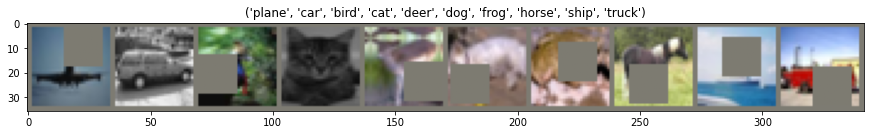

In [ ]:
data = DataEngine(args)
data.show_samples()

In [ ]:

train_loader = data.train_loader

test_loader = data.test_loader

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

#dict to store model loss and accuracy parameters
history = {}

CUDA Available? True


In [ ]:
temp = Net2(args).to(device)
summary(temp, 
        (3, 32, 32),)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 16, 16]           9,216
             ReLU-14           [-1, 32,

In [ ]:
# Input parameters for the model
EPOCHS = 100
l1_decay=0.000
l2_decay=0.0
#norm_type = "BN"
#num_groups=2
#input_img_size=(1, 28, 28)


# Run model for first 20 epochs with high rate, and half it thereafter
model = Net2(args).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=25, gamma=0.5)

# run_model(model, optimizer, scheduler, EPOCHS, l1=0.0, l2=0.0)

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
misclassified_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_loss_list, train_accuracy_list = train(model, device, train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, train_loss_list, train_accuracy_list)
    print("\nlearning rate", optimizer.param_groups[0]['lr'])
    scheduler.step()
    # test(model1, device, test_loader, test_losses, test_acc, misclassified_imgs, epoch==EPOCHS-1)
    test_loss_list, test_accuracy_list, misclassified_imgs = test(model, device, test_loader, criterion, classes, test_loss_list, test_accuracy_list, misclassified_imgs, epoch==EPOCHS-1)

name = 'Net2'
history[name] = {}
history[name]['train_loss'] = train_loss_list
history[name]['train_accuracy'] = train_accuracy_list
history[name]['test_loss'] = test_loss_list
history[name]['test_accuracy'] = test_accuracy_list
history[name]['misclassified_imgs'] = misclassified_imgs

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.7161537408828735 Batch_id=781 Accuracy=35.82: 100%|██████████| 782/782 [00:08<00:00, 95.24it/s] 


length of Average loss 782, length of Average accuracy 782

learning rate 0.01


  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0213, Accuracy: 5116/10000 (51.16%)

EPOCH: 2


Loss=1.2306950092315674 Batch_id=781 Accuracy=47.08: 100%|██████████| 782/782 [00:07<00:00, 101.93it/s]

length of Average loss 1564, length of Average accuracy 1564

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0188, Accuracy: 5748/10000 (57.48%)

EPOCH: 3


Loss=1.4123605489730835 Batch_id=781 Accuracy=53.57: 100%|██████████| 782/782 [00:07<00:00, 98.95it/s] 

length of Average loss 2346, length of Average accuracy 2346

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0162, Accuracy: 6431/10000 (64.31%)

EPOCH: 4


Loss=0.9755755066871643 Batch_id=781 Accuracy=57.69: 100%|██████████| 782/782 [00:07<00:00, 98.03it/s] 

length of Average loss 3128, length of Average accuracy 3128

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0142, Accuracy: 6861/10000 (68.61%)

EPOCH: 5


Loss=1.483270525932312 Batch_id=781 Accuracy=60.37: 100%|██████████| 782/782 [00:07<00:00, 102.50it/s] 

length of Average loss 3910, length of Average accuracy 3910

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0133, Accuracy: 7026/10000 (70.26%)

EPOCH: 6


Loss=1.2859052419662476 Batch_id=781 Accuracy=62.62: 100%|██████████| 782/782 [00:07<00:00, 100.91it/s]

length of Average loss 4692, length of Average accuracy 4692

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0135, Accuracy: 7056/10000 (70.56%)

EPOCH: 7


Loss=1.4591317176818848 Batch_id=781 Accuracy=64.23: 100%|██████████| 782/782 [00:07<00:00, 100.91it/s]

length of Average loss 5474, length of Average accuracy 5474

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0124, Accuracy: 7242/10000 (72.42%)

EPOCH: 8


Loss=1.2550023794174194 Batch_id=781 Accuracy=65.62: 100%|██████████| 782/782 [00:07<00:00, 103.24it/s]

length of Average loss 6256, length of Average accuracy 6256

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0114, Accuracy: 7475/10000 (74.75%)

EPOCH: 9


Loss=1.1719129085540771 Batch_id=781 Accuracy=66.40: 100%|██████████| 782/782 [00:08<00:00, 97.55it/s] 

length of Average loss 7038, length of Average accuracy 7038

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0115, Accuracy: 7403/10000 (74.03%)

EPOCH: 10


Loss=1.5183314085006714 Batch_id=781 Accuracy=67.25: 100%|██████████| 782/782 [00:08<00:00, 94.75it/s]

length of Average loss 7820, length of Average accuracy 7820

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0110, Accuracy: 7528/10000 (75.28%)

EPOCH: 11


Loss=0.8387821316719055 Batch_id=781 Accuracy=67.69: 100%|██████████| 782/782 [00:08<00:00, 95.49it/s]

length of Average loss 8602, length of Average accuracy 8602

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0112, Accuracy: 7574/10000 (75.74%)

EPOCH: 12


Loss=0.9118654131889343 Batch_id=781 Accuracy=68.68: 100%|██████████| 782/782 [00:08<00:00, 95.50it/s]

length of Average loss 9384, length of Average accuracy 9384

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0104, Accuracy: 7694/10000 (76.94%)

EPOCH: 13


Loss=0.773419976234436 Batch_id=781 Accuracy=69.03: 100%|██████████| 782/782 [00:08<00:00, 95.14it/s] 

length of Average loss 10166, length of Average accuracy 10166

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0109, Accuracy: 7583/10000 (75.83%)

EPOCH: 14


Loss=1.0246107578277588 Batch_id=781 Accuracy=69.73: 100%|██████████| 782/782 [00:08<00:00, 95.74it/s] 

length of Average loss 10948, length of Average accuracy 10948

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0104, Accuracy: 7738/10000 (77.38%)

EPOCH: 15


Loss=1.3304178714752197 Batch_id=781 Accuracy=69.82: 100%|██████████| 782/782 [00:07<00:00, 98.69it/s] 

length of Average loss 11730, length of Average accuracy 11730

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0102, Accuracy: 7773/10000 (77.73%)

EPOCH: 16


Loss=0.9454512596130371 Batch_id=781 Accuracy=70.57: 100%|██████████| 782/782 [00:07<00:00, 103.02it/s]

length of Average loss 12512, length of Average accuracy 12512

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0101, Accuracy: 7798/10000 (77.98%)

EPOCH: 17


Loss=1.2794108390808105 Batch_id=781 Accuracy=70.97: 100%|██████████| 782/782 [00:08<00:00, 97.17it/s] 

length of Average loss 13294, length of Average accuracy 13294

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0097, Accuracy: 7852/10000 (78.52%)

EPOCH: 18


Loss=0.34410595893859863 Batch_id=781 Accuracy=71.33: 100%|██████████| 782/782 [00:08<00:00, 95.50it/s]

length of Average loss 14076, length of Average accuracy 14076

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0096, Accuracy: 7885/10000 (78.85%)

EPOCH: 19


Loss=1.0439859628677368 Batch_id=781 Accuracy=71.39: 100%|██████████| 782/782 [00:08<00:00, 94.85it/s] 

length of Average loss 14858, length of Average accuracy 14858

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0094, Accuracy: 7941/10000 (79.41%)

EPOCH: 20


Loss=0.868405818939209 Batch_id=781 Accuracy=72.05: 100%|██████████| 782/782 [00:08<00:00, 95.07it/s] 

length of Average loss 15640, length of Average accuracy 15640

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0091, Accuracy: 7968/10000 (79.68%)

EPOCH: 21


Loss=0.7248356938362122 Batch_id=781 Accuracy=72.29: 100%|██████████| 782/782 [00:08<00:00, 95.59it/s] 


length of Average loss 16422, length of Average accuracy 16422

learning rate 0.01


  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0091, Accuracy: 7985/10000 (79.85%)

EPOCH: 22


Loss=0.8467167615890503 Batch_id=781 Accuracy=72.31: 100%|██████████| 782/782 [00:08<00:00, 95.04it/s] 

length of Average loss 17204, length of Average accuracy 17204

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0091, Accuracy: 8009/10000 (80.09%)

EPOCH: 23


Loss=0.5465609431266785 Batch_id=781 Accuracy=72.89: 100%|██████████| 782/782 [00:07<00:00, 101.98it/s] 

length of Average loss 17986, length of Average accuracy 17986

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 8003/10000 (80.03%)

EPOCH: 24


Loss=1.1271003484725952 Batch_id=781 Accuracy=73.06: 100%|██████████| 782/782 [00:07<00:00, 101.58it/s]

length of Average loss 18768, length of Average accuracy 18768

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8077/10000 (80.77%)

EPOCH: 25


Loss=0.6038707494735718 Batch_id=781 Accuracy=72.88: 100%|██████████| 782/782 [00:07<00:00, 102.31it/s] 

length of Average loss 19550, length of Average accuracy 19550

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8102/10000 (81.02%)

EPOCH: 26


Loss=0.6352481842041016 Batch_id=781 Accuracy=74.67: 100%|██████████| 782/782 [00:08<00:00, 96.43it/s]  

length of Average loss 20332, length of Average accuracy 20332

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 8174/10000 (81.74%)

EPOCH: 27


Loss=0.5818342566490173 Batch_id=781 Accuracy=75.00: 100%|██████████| 782/782 [00:07<00:00, 102.14it/s] 

length of Average loss 21114, length of Average accuracy 21114

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8086/10000 (80.86%)

EPOCH: 28


Loss=0.7920379042625427 Batch_id=781 Accuracy=75.08: 100%|██████████| 782/782 [00:07<00:00, 100.20it/s] 

length of Average loss 21896, length of Average accuracy 21896

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8219/10000 (82.19%)

EPOCH: 29


Loss=0.6646153926849365 Batch_id=781 Accuracy=75.53: 100%|██████████| 782/782 [00:07<00:00, 101.86it/s] 

length of Average loss 22678, length of Average accuracy 22678

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8192/10000 (81.92%)

EPOCH: 30


Loss=0.3836686909198761 Batch_id=781 Accuracy=75.87: 100%|██████████| 782/782 [00:07<00:00, 102.27it/s] 

length of Average loss 23460, length of Average accuracy 23460

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8245/10000 (82.45%)

EPOCH: 31


Loss=0.7380814552307129 Batch_id=781 Accuracy=75.99: 100%|██████████| 782/782 [00:07<00:00, 101.59it/s] 

length of Average loss 24242, length of Average accuracy 24242

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8216/10000 (82.16%)

EPOCH: 32


Loss=0.9857774376869202 Batch_id=781 Accuracy=75.53: 100%|██████████| 782/782 [00:07<00:00, 101.23it/s] 

length of Average loss 25024, length of Average accuracy 25024

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8270/10000 (82.70%)

EPOCH: 33


Loss=0.5891909599304199 Batch_id=781 Accuracy=75.89: 100%|██████████| 782/782 [00:07<00:00, 103.14it/s] 

length of Average loss 25806, length of Average accuracy 25806

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8281/10000 (82.81%)

EPOCH: 34


Loss=0.5301414132118225 Batch_id=781 Accuracy=76.06: 100%|██████████| 782/782 [00:07<00:00, 103.67it/s] 

length of Average loss 26588, length of Average accuracy 26588

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8216/10000 (82.16%)

EPOCH: 35


Loss=0.5632999539375305 Batch_id=781 Accuracy=76.08: 100%|██████████| 782/782 [00:07<00:00, 102.94it/s] 

length of Average loss 27370, length of Average accuracy 27370

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8227/10000 (82.27%)

EPOCH: 36


Loss=0.5684884190559387 Batch_id=781 Accuracy=76.48: 100%|██████████| 782/782 [00:07<00:00, 104.17it/s] 

length of Average loss 28152, length of Average accuracy 28152

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8231/10000 (82.31%)

EPOCH: 37


Loss=0.5097687244415283 Batch_id=781 Accuracy=76.54: 100%|██████████| 782/782 [00:07<00:00, 103.24it/s] 

length of Average loss 28934, length of Average accuracy 28934

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8259/10000 (82.59%)

EPOCH: 38


Loss=0.8430586457252502 Batch_id=781 Accuracy=76.55: 100%|██████████| 782/782 [00:07<00:00, 103.23it/s] 


length of Average loss 29716, length of Average accuracy 29716

learning rate 0.005


  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8310/10000 (83.10%)

EPOCH: 39


Loss=0.9579801559448242 Batch_id=781 Accuracy=76.35: 100%|██████████| 782/782 [00:07<00:00, 102.12it/s] 

length of Average loss 30498, length of Average accuracy 30498

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8240/10000 (82.40%)

EPOCH: 40


Loss=0.8567734956741333 Batch_id=781 Accuracy=76.79: 100%|██████████| 782/782 [00:07<00:00, 103.64it/s] 

length of Average loss 31280, length of Average accuracy 31280

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8239/10000 (82.39%)

EPOCH: 41


Loss=0.4517616331577301 Batch_id=781 Accuracy=76.78: 100%|██████████| 782/782 [00:07<00:00, 101.90it/s] 

length of Average loss 32062, length of Average accuracy 32062

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8289/10000 (82.89%)

EPOCH: 42


Loss=0.9094765782356262 Batch_id=781 Accuracy=76.74: 100%|██████████| 782/782 [00:07<00:00, 102.17it/s] 

length of Average loss 32844, length of Average accuracy 32844

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8278/10000 (82.78%)

EPOCH: 43


Loss=0.5058858394622803 Batch_id=781 Accuracy=76.92: 100%|██████████| 782/782 [00:07<00:00, 101.67it/s] 

length of Average loss 33626, length of Average accuracy 33626

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8337/10000 (83.37%)

EPOCH: 44


Loss=0.7152591943740845 Batch_id=781 Accuracy=77.09: 100%|██████████| 782/782 [00:07<00:00, 101.78it/s] 

length of Average loss 34408, length of Average accuracy 34408

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8274/10000 (82.74%)

EPOCH: 45


Loss=0.4390498399734497 Batch_id=781 Accuracy=77.00: 100%|██████████| 782/782 [00:07<00:00, 103.25it/s] 

length of Average loss 35190, length of Average accuracy 35190

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8306/10000 (83.06%)

EPOCH: 46


Loss=0.5443726778030396 Batch_id=781 Accuracy=77.01: 100%|██████████| 782/782 [00:07<00:00, 101.26it/s] 

length of Average loss 35972, length of Average accuracy 35972

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0077, Accuracy: 8286/10000 (82.86%)

EPOCH: 47


Loss=0.9494543075561523 Batch_id=781 Accuracy=77.08: 100%|██████████| 782/782 [00:07<00:00, 101.89it/s] 

length of Average loss 36754, length of Average accuracy 36754

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8309/10000 (83.09%)

EPOCH: 48


Loss=0.7068202495574951 Batch_id=781 Accuracy=77.22: 100%|██████████| 782/782 [00:07<00:00, 98.97it/s]  

length of Average loss 37536, length of Average accuracy 37536

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8345/10000 (83.45%)

EPOCH: 49


Loss=0.5663543939590454 Batch_id=781 Accuracy=77.16: 100%|██████████| 782/782 [00:08<00:00, 94.08it/s]  

length of Average loss 38318, length of Average accuracy 38318

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 8370/10000 (83.70%)

EPOCH: 50


Loss=0.5649204850196838 Batch_id=781 Accuracy=77.26: 100%|██████████| 782/782 [00:07<00:00, 101.08it/s] 

length of Average loss 39100, length of Average accuracy 39100

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8341/10000 (83.41%)

EPOCH: 51


Loss=0.8332130312919617 Batch_id=781 Accuracy=78.49: 100%|██████████| 782/782 [00:07<00:00, 102.33it/s] 

length of Average loss 39882, length of Average accuracy 39882

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8360/10000 (83.60%)

EPOCH: 52


Loss=0.8397487998008728 Batch_id=781 Accuracy=78.28: 100%|██████████| 782/782 [00:07<00:00, 102.45it/s] 

length of Average loss 40664, length of Average accuracy 40664

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8431/10000 (84.31%)

EPOCH: 53


Loss=0.4987996816635132 Batch_id=781 Accuracy=78.55: 100%|██████████| 782/782 [00:07<00:00, 99.01it/s]  

length of Average loss 41446, length of Average accuracy 41446

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8402/10000 (84.02%)

EPOCH: 54


Loss=1.0240473747253418 Batch_id=781 Accuracy=78.59: 100%|██████████| 782/782 [00:08<00:00, 95.97it/s]  

length of Average loss 42228, length of Average accuracy 42228

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8408/10000 (84.08%)

EPOCH: 55


Loss=0.6088288426399231 Batch_id=781 Accuracy=78.77: 100%|██████████| 782/782 [00:08<00:00, 95.53it/s]  

length of Average loss 43010, length of Average accuracy 43010

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8411/10000 (84.11%)

EPOCH: 56


Loss=1.079506278038025 Batch_id=781 Accuracy=78.38: 100%|██████████| 782/782 [00:08<00:00, 95.80it/s]  

length of Average loss 43792, length of Average accuracy 43792

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8418/10000 (84.18%)

EPOCH: 57


Loss=0.47917622327804565 Batch_id=781 Accuracy=78.62: 100%|██████████| 782/782 [00:07<00:00, 101.48it/s]

length of Average loss 44574, length of Average accuracy 44574

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8419/10000 (84.19%)

EPOCH: 58


Loss=0.43046367168426514 Batch_id=781 Accuracy=78.51: 100%|██████████| 782/782 [00:07<00:00, 100.15it/s]

length of Average loss 45356, length of Average accuracy 45356

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8381/10000 (83.81%)

EPOCH: 59


Loss=0.3118034601211548 Batch_id=781 Accuracy=78.87: 100%|██████████| 782/782 [00:08<00:00, 97.11it/s]  

length of Average loss 46138, length of Average accuracy 46138

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8393/10000 (83.93%)

EPOCH: 60


Loss=0.957452654838562 Batch_id=781 Accuracy=78.96: 100%|██████████| 782/782 [00:08<00:00, 95.89it/s]  

length of Average loss 46920, length of Average accuracy 46920

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8412/10000 (84.12%)

EPOCH: 61


Loss=0.4631574749946594 Batch_id=781 Accuracy=78.81: 100%|██████████| 782/782 [00:08<00:00, 96.21it/s]  

length of Average loss 47702, length of Average accuracy 47702

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8450/10000 (84.50%)

EPOCH: 62


Loss=0.9377787113189697 Batch_id=781 Accuracy=78.81: 100%|██████████| 782/782 [00:08<00:00, 93.15it/s] 

length of Average loss 48484, length of Average accuracy 48484

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8407/10000 (84.07%)

EPOCH: 63


Loss=0.6908347606658936 Batch_id=781 Accuracy=78.99: 100%|██████████| 782/782 [00:08<00:00, 92.85it/s] 

length of Average loss 49266, length of Average accuracy 49266

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8429/10000 (84.29%)

EPOCH: 64


Loss=0.5706979632377625 Batch_id=781 Accuracy=78.82: 100%|██████████| 782/782 [00:08<00:00, 93.13it/s] 

length of Average loss 50048, length of Average accuracy 50048

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8444/10000 (84.44%)

EPOCH: 65


Loss=0.44598588347435 Batch_id=781 Accuracy=79.00: 100%|██████████| 782/782 [00:08<00:00, 93.39it/s]   

length of Average loss 50830, length of Average accuracy 50830

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8431/10000 (84.31%)

EPOCH: 66


Loss=0.32255950570106506 Batch_id=781 Accuracy=78.73: 100%|██████████| 782/782 [00:08<00:00, 93.08it/s]

length of Average loss 51612, length of Average accuracy 51612

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8463/10000 (84.63%)

EPOCH: 67


Loss=0.6248896718025208 Batch_id=781 Accuracy=79.23: 100%|██████████| 782/782 [00:08<00:00, 93.40it/s] 

length of Average loss 52394, length of Average accuracy 52394

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8452/10000 (84.52%)

EPOCH: 68


Loss=0.5275183916091919 Batch_id=781 Accuracy=78.88: 100%|██████████| 782/782 [00:08<00:00, 93.31it/s] 

length of Average loss 53176, length of Average accuracy 53176

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8420/10000 (84.20%)

EPOCH: 69


Loss=0.7970419526100159 Batch_id=781 Accuracy=79.14: 100%|██████████| 782/782 [00:08<00:00, 93.32it/s] 

length of Average loss 53958, length of Average accuracy 53958

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8455/10000 (84.55%)

EPOCH: 70


Loss=0.8282403349876404 Batch_id=781 Accuracy=79.36: 100%|██████████| 782/782 [00:08<00:00, 93.39it/s] 

length of Average loss 54740, length of Average accuracy 54740

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8434/10000 (84.34%)

EPOCH: 71


Loss=0.4673129916191101 Batch_id=781 Accuracy=79.13: 100%|██████████| 782/782 [00:08<00:00, 93.29it/s] 

length of Average loss 55522, length of Average accuracy 55522

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8456/10000 (84.56%)

EPOCH: 72


Loss=0.6500966548919678 Batch_id=781 Accuracy=79.23: 100%|██████████| 782/782 [00:08<00:00, 92.92it/s] 

length of Average loss 56304, length of Average accuracy 56304

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8451/10000 (84.51%)

EPOCH: 73


Loss=0.48311370611190796 Batch_id=781 Accuracy=79.52: 100%|██████████| 782/782 [00:08<00:00, 93.32it/s]

length of Average loss 57086, length of Average accuracy 57086

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8459/10000 (84.59%)

EPOCH: 74


Loss=0.670329213142395 Batch_id=781 Accuracy=79.47: 100%|██████████| 782/782 [00:08<00:00, 92.25it/s]  

length of Average loss 57868, length of Average accuracy 57868

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8421/10000 (84.21%)

EPOCH: 75


Loss=0.2565981149673462 Batch_id=781 Accuracy=79.48: 100%|██████████| 782/782 [00:08<00:00, 93.47it/s] 


length of Average loss 58650, length of Average accuracy 58650

learning rate 0.0025


  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8468/10000 (84.68%)

EPOCH: 76


Loss=0.7440122961997986 Batch_id=781 Accuracy=79.93: 100%|██████████| 782/782 [00:08<00:00, 93.21it/s] 

length of Average loss 59432, length of Average accuracy 59432

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8478/10000 (84.78%)

EPOCH: 77


Loss=0.9509693384170532 Batch_id=781 Accuracy=79.87: 100%|██████████| 782/782 [00:08<00:00, 92.93it/s] 


length of Average loss 60214, length of Average accuracy 60214

learning rate 0.00125


  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8474/10000 (84.74%)

EPOCH: 78


Loss=0.7525514960289001 Batch_id=781 Accuracy=80.20: 100%|██████████| 782/782 [00:08<00:00, 97.49it/s]  

length of Average loss 60996, length of Average accuracy 60996

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8481/10000 (84.81%)

EPOCH: 79


Loss=0.9054075479507446 Batch_id=781 Accuracy=80.18: 100%|██████████| 782/782 [00:07<00:00, 101.95it/s] 

length of Average loss 61778, length of Average accuracy 61778

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8466/10000 (84.66%)

EPOCH: 80


Loss=0.6940717101097107 Batch_id=781 Accuracy=80.13: 100%|██████████| 782/782 [00:08<00:00, 94.90it/s]  

length of Average loss 62560, length of Average accuracy 62560

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 91 %
Accuracy of  bird : 81 %
Accuracy of   cat : 69 %
Accuracy of  deer : 87 %
Accuracy of   dog : 73 %
Accuracy of  frog : 94 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0070, Accuracy: 8504/10000 (85.04%)

EPOCH: 81


Loss=0.6298977136611938 Batch_id=781 Accuracy=80.11: 100%|██████████| 782/782 [00:07<00:00, 100.20it/s] 

length of Average loss 63342, length of Average accuracy 63342

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 90 %
Accuracy of  bird : 74 %
Accuracy of   cat : 73 %
Accuracy of  deer : 79 %
Accuracy of   dog : 80 %
Accuracy of  frog : 86 %
Accuracy of horse : 90 %
Accuracy of  ship : 90 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0068, Accuracy: 8517/10000 (85.17%)

EPOCH: 82


Loss=0.6501115560531616 Batch_id=781 Accuracy=80.22: 100%|██████████| 782/782 [00:07<00:00, 99.76it/s]  

length of Average loss 64124, length of Average accuracy 64124

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8483/10000 (84.83%)

EPOCH: 83


Loss=0.5180613398551941 Batch_id=781 Accuracy=80.10: 100%|██████████| 782/782 [00:08<00:00, 95.72it/s]  

length of Average loss 64906, length of Average accuracy 64906

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8484/10000 (84.84%)

EPOCH: 84


Loss=0.6825795769691467 Batch_id=781 Accuracy=80.16: 100%|██████████| 782/782 [00:08<00:00, 96.14it/s]  

length of Average loss 65688, length of Average accuracy 65688

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 96 %
Accuracy of  bird : 64 %
Accuracy of   cat : 62 %
Accuracy of  deer : 86 %
Accuracy of   dog : 73 %
Accuracy of  frog : 88 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0069, Accuracy: 8512/10000 (85.12%)

EPOCH: 85


Loss=0.7047914862632751 Batch_id=781 Accuracy=80.14: 100%|██████████| 782/782 [00:08<00:00, 96.86it/s]  

length of Average loss 66470, length of Average accuracy 66470

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8489/10000 (84.89%)

EPOCH: 86


Loss=0.32421261072158813 Batch_id=781 Accuracy=80.45: 100%|██████████| 782/782 [00:08<00:00, 97.40it/s] 

length of Average loss 67252, length of Average accuracy 67252

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8493/10000 (84.93%)

EPOCH: 87


Loss=0.46563878655433655 Batch_id=781 Accuracy=80.30: 100%|██████████| 782/782 [00:07<00:00, 97.76it/s] 

length of Average loss 68034, length of Average accuracy 68034

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8492/10000 (84.92%)

EPOCH: 88


Loss=0.2995704114437103 Batch_id=781 Accuracy=80.20: 100%|██████████| 782/782 [00:07<00:00, 99.21it/s]  

length of Average loss 68816, length of Average accuracy 68816

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 81 %
Accuracy of   car : 86 %
Accuracy of  bird : 87 %
Accuracy of   cat : 69 %
Accuracy of  deer : 89 %
Accuracy of   dog : 85 %
Accuracy of  frog : 92 %
Accuracy of horse : 87 %
Accuracy of  ship : 91 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0068, Accuracy: 8522/10000 (85.22%)

EPOCH: 89


Loss=0.9058122038841248 Batch_id=781 Accuracy=80.07: 100%|██████████| 782/782 [00:08<00:00, 96.53it/s]  

length of Average loss 69598, length of Average accuracy 69598

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8494/10000 (84.94%)

EPOCH: 90


Loss=0.39662960171699524 Batch_id=781 Accuracy=80.12: 100%|██████████| 782/782 [00:08<00:00, 97.55it/s] 

length of Average loss 70380, length of Average accuracy 70380

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 86 %
Accuracy of   car : 97 %
Accuracy of  bird : 77 %
Accuracy of   cat : 63 %
Accuracy of  deer : 87 %
Accuracy of   dog : 74 %
Accuracy of  frog : 96 %
Accuracy of horse : 91 %
Accuracy of  ship : 90 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0068, Accuracy: 8520/10000 (85.20%)

EPOCH: 91


Loss=0.49265798926353455 Batch_id=781 Accuracy=80.21: 100%|██████████| 782/782 [00:07<00:00, 100.04it/s]

length of Average loss 71162, length of Average accuracy 71162

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 97 %
Accuracy of  bird : 74 %
Accuracy of   cat : 56 %
Accuracy of  deer : 90 %
Accuracy of   dog : 65 %
Accuracy of  frog : 100 %
Accuracy of horse : 94 %
Accuracy of  ship : 89 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0070, Accuracy: 8503/10000 (85.03%)

EPOCH: 92


Loss=0.6483935117721558 Batch_id=781 Accuracy=80.28: 100%|██████████| 782/782 [00:08<00:00, 96.96it/s]  


length of Average loss 71944, length of Average accuracy 71944

learning rate 0.00125


  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 90 %
Accuracy of  bird : 72 %
Accuracy of   cat : 69 %
Accuracy of  deer : 90 %
Accuracy of   dog : 66 %
Accuracy of  frog : 89 %
Accuracy of horse : 91 %
Accuracy of  ship : 91 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0068, Accuracy: 8527/10000 (85.27%)

EPOCH: 93


Loss=0.38237088918685913 Batch_id=781 Accuracy=80.21: 100%|██████████| 782/782 [00:08<00:00, 94.00it/s] 

length of Average loss 72726, length of Average accuracy 72726

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 98 %
Accuracy of  bird : 78 %
Accuracy of   cat : 75 %
Accuracy of  deer : 83 %
Accuracy of   dog : 81 %
Accuracy of  frog : 96 %
Accuracy of horse : 84 %
Accuracy of  ship : 96 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0068, Accuracy: 8523/10000 (85.23%)

EPOCH: 94


Loss=0.35758519172668457 Batch_id=781 Accuracy=80.51: 100%|██████████| 782/782 [00:08<00:00, 94.47it/s]

length of Average loss 73508, length of Average accuracy 73508

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 94 %
Accuracy of  bird : 75 %
Accuracy of   cat : 70 %
Accuracy of  deer : 90 %
Accuracy of   dog : 82 %
Accuracy of  frog : 95 %
Accuracy of horse : 90 %
Accuracy of  ship : 96 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0069, Accuracy: 8505/10000 (85.05%)

EPOCH: 95


Loss=0.7274124622344971 Batch_id=781 Accuracy=80.37: 100%|██████████| 782/782 [00:08<00:00, 95.75it/s]  

length of Average loss 74290, length of Average accuracy 74290

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8494/10000 (84.94%)

EPOCH: 96


Loss=0.7266407012939453 Batch_id=781 Accuracy=80.56: 100%|██████████| 782/782 [00:08<00:00, 96.21it/s] 

length of Average loss 75072, length of Average accuracy 75072

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8490/10000 (84.90%)

EPOCH: 97


Loss=0.8493121862411499 Batch_id=781 Accuracy=80.54: 100%|██████████| 782/782 [00:08<00:00, 96.00it/s] 

length of Average loss 75854, length of Average accuracy 75854

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8491/10000 (84.91%)

EPOCH: 98


Loss=0.7815576195716858 Batch_id=781 Accuracy=80.31: 100%|██████████| 782/782 [00:08<00:00, 96.35it/s]  

length of Average loss 76636, length of Average accuracy 76636

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8489/10000 (84.89%)

EPOCH: 99


Loss=0.5255634784698486 Batch_id=781 Accuracy=80.38: 100%|██████████| 782/782 [00:08<00:00, 94.76it/s]  

length of Average loss 77418, length of Average accuracy 77418

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8492/10000 (84.92%)

EPOCH: 100


Loss=0.34647947549819946 Batch_id=781 Accuracy=80.64: 100%|██████████| 782/782 [00:08<00:00, 94.81it/s]


length of Average loss 78200, length of Average accuracy 78200

learning rate 0.00125

Accuracy of plane : 85 %
Accuracy of   car : 94 %
Accuracy of  bird : 81 %
Accuracy of   cat : 62 %
Accuracy of  deer : 88 %
Accuracy of   dog : 74 %
Accuracy of  frog : 88 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0069, Accuracy: 8517/10000 (85.17%)



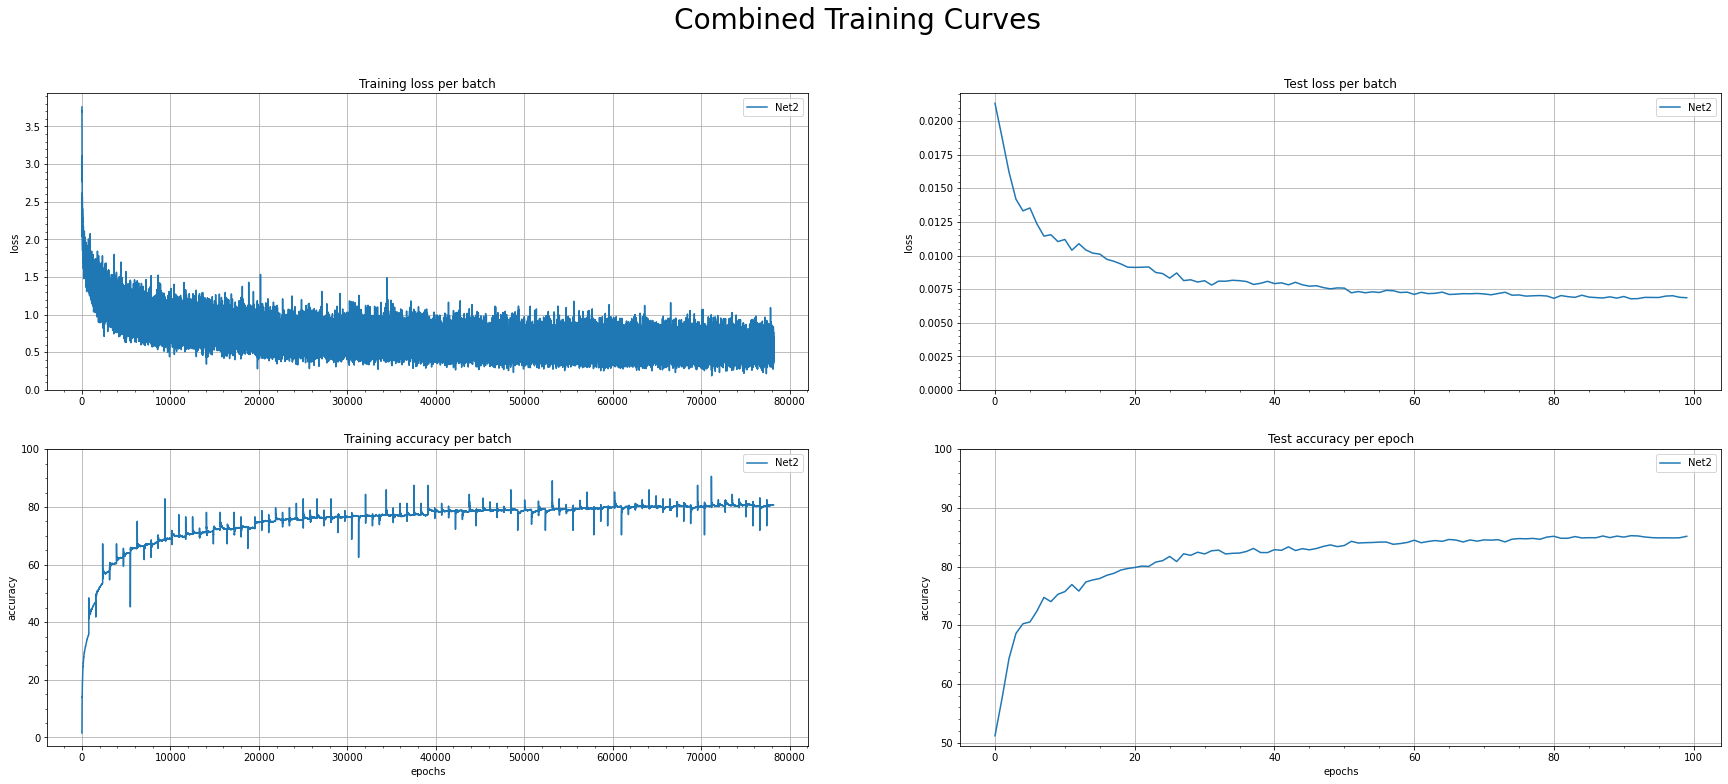

In [ ]:
training_curves(history)

In [ ]:
# Input parameters for the model
EPOCHS = 20
l1_decay=0.000
l2_decay=0.0
#norm_type = "BN"
#num_groups=2
#input_img_size=(1, 28, 28)


# Run model for first 20 epochs with high rate, and half it thereafter
#model = Net2(args).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=30, gamma=0.5)

# run_model(model, optimizer, scheduler, EPOCHS, l1=0.0, l2=0.0)

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
misclassified_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_loss_list, train_accuracy_list = train(model, device, train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, train_loss_list, train_accuracy_list)
    print("\nlearning rate", optimizer.param_groups[0]['lr'])
    scheduler.step()
    # test(model1, device, test_loader, test_losses, test_acc, misclassified_imgs, epoch==EPOCHS-1)
    test_loss_list, test_accuracy_list, misclassified_imgs = test(model, device, test_loader, criterion, classes, test_loss_list, test_accuracy_list, misclassified_imgs, epoch==EPOCHS-1)

name = 'Net2'
history[name] = {}
history[name]['train_loss'] = train_loss_list
history[name]['train_accuracy'] = train_accuracy_list
history[name]['test_loss'] = test_loss_list
history[name]['test_accuracy'] = test_accuracy_list
history[name]['misclassified_imgs'] = misclassified_imgs

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.36542433500289917 Batch_id=781 Accuracy=80.52: 100%|██████████| 782/782 [00:08<00:00, 94.28it/s]

length of Average loss 782, length of Average accuracy 782

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 76 %
Accuracy of   cat : 78 %
Accuracy of  deer : 84 %
Accuracy of   dog : 80 %
Accuracy of  frog : 91 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0068, Accuracy: 8537/10000 (85.37%)

EPOCH: 2


Loss=0.3895857334136963 Batch_id=781 Accuracy=80.67: 100%|██████████| 782/782 [00:08<00:00, 93.41it/s] 

length of Average loss 1564, length of Average accuracy 1564

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 93 %
Accuracy of  bird : 78 %
Accuracy of   cat : 62 %
Accuracy of  deer : 86 %
Accuracy of   dog : 75 %
Accuracy of  frog : 93 %
Accuracy of horse : 93 %
Accuracy of  ship : 90 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0069, Accuracy: 8521/10000 (85.21%)

EPOCH: 3


Loss=0.33773887157440186 Batch_id=781 Accuracy=80.48: 100%|██████████| 782/782 [00:08<00:00, 94.21it/s] 

length of Average loss 2346, length of Average accuracy 2346

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 8498/10000 (84.98%)

EPOCH: 4


Loss=0.21118886768817902 Batch_id=781 Accuracy=80.80: 100%|██████████| 782/782 [00:08<00:00, 94.07it/s]

length of Average loss 3128, length of Average accuracy 3128

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 98 %
Accuracy of  bird : 78 %
Accuracy of   cat : 55 %
Accuracy of  deer : 85 %
Accuracy of   dog : 82 %
Accuracy of  frog : 90 %
Accuracy of horse : 94 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0068, Accuracy: 8517/10000 (85.17%)

EPOCH: 5


Loss=0.8984525203704834 Batch_id=781 Accuracy=80.73: 100%|██████████| 782/782 [00:08<00:00, 94.13it/s] 

length of Average loss 3910, length of Average accuracy 3910

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 92 %
Accuracy of  bird : 78 %
Accuracy of   cat : 64 %
Accuracy of  deer : 86 %
Accuracy of   dog : 73 %
Accuracy of  frog : 91 %
Accuracy of horse : 90 %
Accuracy of  ship : 100 %
Accuracy of truck : 98 %

Test set: Average loss: 0.0070, Accuracy: 8503/10000 (85.03%)

EPOCH: 6


Loss=0.7543866634368896 Batch_id=781 Accuracy=80.61: 100%|██████████| 782/782 [00:08<00:00, 93.60it/s] 

length of Average loss 4692, length of Average accuracy 4692

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 78 %
Accuracy of   car : 92 %
Accuracy of  bird : 70 %
Accuracy of   cat : 61 %
Accuracy of  deer : 90 %
Accuracy of   dog : 72 %
Accuracy of  frog : 93 %
Accuracy of horse : 96 %
Accuracy of  ship : 91 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0069, Accuracy: 8518/10000 (85.18%)

EPOCH: 7


Loss=0.8449397683143616 Batch_id=781 Accuracy=80.65: 100%|██████████| 782/782 [00:08<00:00, 94.61it/s] 

length of Average loss 5474, length of Average accuracy 5474

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 92 %
Accuracy of  bird : 85 %
Accuracy of   cat : 66 %
Accuracy of  deer : 85 %
Accuracy of   dog : 73 %
Accuracy of  frog : 93 %
Accuracy of horse : 90 %
Accuracy of  ship : 96 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0068, Accuracy: 8525/10000 (85.25%)

EPOCH: 8


Loss=1.1198385953903198 Batch_id=781 Accuracy=80.86: 100%|██████████| 782/782 [00:08<00:00, 95.77it/s] 

length of Average loss 6256, length of Average accuracy 6256

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 94 %
Accuracy of  bird : 80 %
Accuracy of   cat : 63 %
Accuracy of  deer : 91 %
Accuracy of   dog : 77 %
Accuracy of  frog : 94 %
Accuracy of horse : 90 %
Accuracy of  ship : 90 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0067, Accuracy: 8528/10000 (85.28%)

EPOCH: 9


Loss=0.5835397243499756 Batch_id=781 Accuracy=80.46: 100%|██████████| 782/782 [00:08<00:00, 95.88it/s]  

length of Average loss 7038, length of Average accuracy 7038

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 89 %
Accuracy of  bird : 72 %
Accuracy of   cat : 62 %
Accuracy of  deer : 86 %
Accuracy of   dog : 74 %
Accuracy of  frog : 88 %
Accuracy of horse : 83 %
Accuracy of  ship : 85 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0069, Accuracy: 8507/10000 (85.07%)

EPOCH: 10


Loss=0.5161716341972351 Batch_id=781 Accuracy=80.50: 100%|██████████| 782/782 [00:08<00:00, 96.28it/s]  

length of Average loss 7820, length of Average accuracy 7820

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 94 %
Accuracy of  bird : 86 %
Accuracy of   cat : 63 %
Accuracy of  deer : 87 %
Accuracy of   dog : 73 %
Accuracy of  frog : 91 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0069, Accuracy: 8508/10000 (85.08%)

EPOCH: 11


Loss=0.7077003121376038 Batch_id=781 Accuracy=80.75: 100%|██████████| 782/782 [00:08<00:00, 97.42it/s]  

length of Average loss 8602, length of Average accuracy 8602

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 94 %
Accuracy of  bird : 79 %
Accuracy of   cat : 62 %
Accuracy of  deer : 89 %
Accuracy of   dog : 80 %
Accuracy of  frog : 92 %
Accuracy of horse : 95 %
Accuracy of  ship : 91 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0068, Accuracy: 8536/10000 (85.36%)

EPOCH: 12


Loss=0.6364726424217224 Batch_id=781 Accuracy=80.85: 100%|██████████| 782/782 [00:07<00:00, 98.99it/s]  

length of Average loss 9384, length of Average accuracy 9384

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8497/10000 (84.97%)

EPOCH: 13


Loss=0.5455753207206726 Batch_id=781 Accuracy=80.84: 100%|██████████| 782/782 [00:07<00:00, 98.12it/s]  

length of Average loss 10166, length of Average accuracy 10166

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 98 %
Accuracy of  bird : 66 %
Accuracy of   cat : 64 %
Accuracy of  deer : 98 %
Accuracy of   dog : 81 %
Accuracy of  frog : 93 %
Accuracy of horse : 92 %
Accuracy of  ship : 87 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0067, Accuracy: 8543/10000 (85.43%)

EPOCH: 14


Loss=0.831660270690918 Batch_id=781 Accuracy=80.77: 100%|██████████| 782/782 [00:07<00:00, 101.21it/s]  

length of Average loss 10948, length of Average accuracy 10948

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 67 %
Accuracy of  deer : 83 %
Accuracy of   dog : 62 %
Accuracy of  frog : 91 %
Accuracy of horse : 89 %
Accuracy of  ship : 83 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0068, Accuracy: 8534/10000 (85.34%)

EPOCH: 15


Loss=0.5533272624015808 Batch_id=781 Accuracy=80.78: 100%|██████████| 782/782 [00:07<00:00, 102.31it/s] 

length of Average loss 11730, length of Average accuracy 11730

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 96 %
Accuracy of  bird : 83 %
Accuracy of   cat : 77 %
Accuracy of  deer : 84 %
Accuracy of   dog : 76 %
Accuracy of  frog : 94 %
Accuracy of horse : 93 %
Accuracy of  ship : 87 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0068, Accuracy: 8507/10000 (85.07%)

EPOCH: 16


Loss=0.5590338706970215 Batch_id=781 Accuracy=81.08: 100%|██████████| 782/782 [00:07<00:00, 100.31it/s] 


length of Average loss 12512, length of Average accuracy 12512

learning rate 0.001


  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8486/10000 (84.86%)

EPOCH: 17


Loss=1.1951267719268799 Batch_id=781 Accuracy=80.59: 100%|██████████| 782/782 [00:07<00:00, 101.03it/s] 

length of Average loss 13294, length of Average accuracy 13294

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 82 %
Accuracy of   car : 93 %
Accuracy of  bird : 80 %
Accuracy of   cat : 71 %
Accuracy of  deer : 95 %
Accuracy of   dog : 79 %
Accuracy of  frog : 95 %
Accuracy of horse : 84 %
Accuracy of  ship : 92 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0067, Accuracy: 8556/10000 (85.56%)

EPOCH: 18


Loss=0.7894948124885559 Batch_id=781 Accuracy=80.73: 100%|██████████| 782/782 [00:07<00:00, 100.84it/s] 

length of Average loss 14076, length of Average accuracy 14076

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 97 %
Accuracy of  bird : 72 %
Accuracy of   cat : 56 %
Accuracy of  deer : 87 %
Accuracy of   dog : 70 %
Accuracy of  frog : 96 %
Accuracy of horse : 96 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0068, Accuracy: 8517/10000 (85.17%)

EPOCH: 19


Loss=0.6350269317626953 Batch_id=781 Accuracy=80.77: 100%|██████████| 782/782 [00:07<00:00, 101.83it/s] 

length of Average loss 14858, length of Average accuracy 14858

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 96 %
Accuracy of  bird : 83 %
Accuracy of   cat : 72 %
Accuracy of  deer : 80 %
Accuracy of   dog : 64 %
Accuracy of  frog : 82 %
Accuracy of horse : 93 %
Accuracy of  ship : 88 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0067, Accuracy: 8548/10000 (85.48%)

EPOCH: 20


Loss=0.9505606293678284 Batch_id=781 Accuracy=80.88: 100%|██████████| 782/782 [00:07<00:00, 100.85it/s] 

length of Average loss 15640, length of Average accuracy 15640

learning rate 0.001



Accuracy of plane : 84 %
Accuracy of   car : 93 %
Accuracy of  bird : 73 %
Accuracy of   cat : 73 %
Accuracy of  deer : 94 %
Accuracy of   dog : 74 %
Accuracy of  frog : 90 %
Accuracy of horse : 85 %
Accuracy of  ship : 95 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0068, Accuracy: 8555/10000 (85.55%)



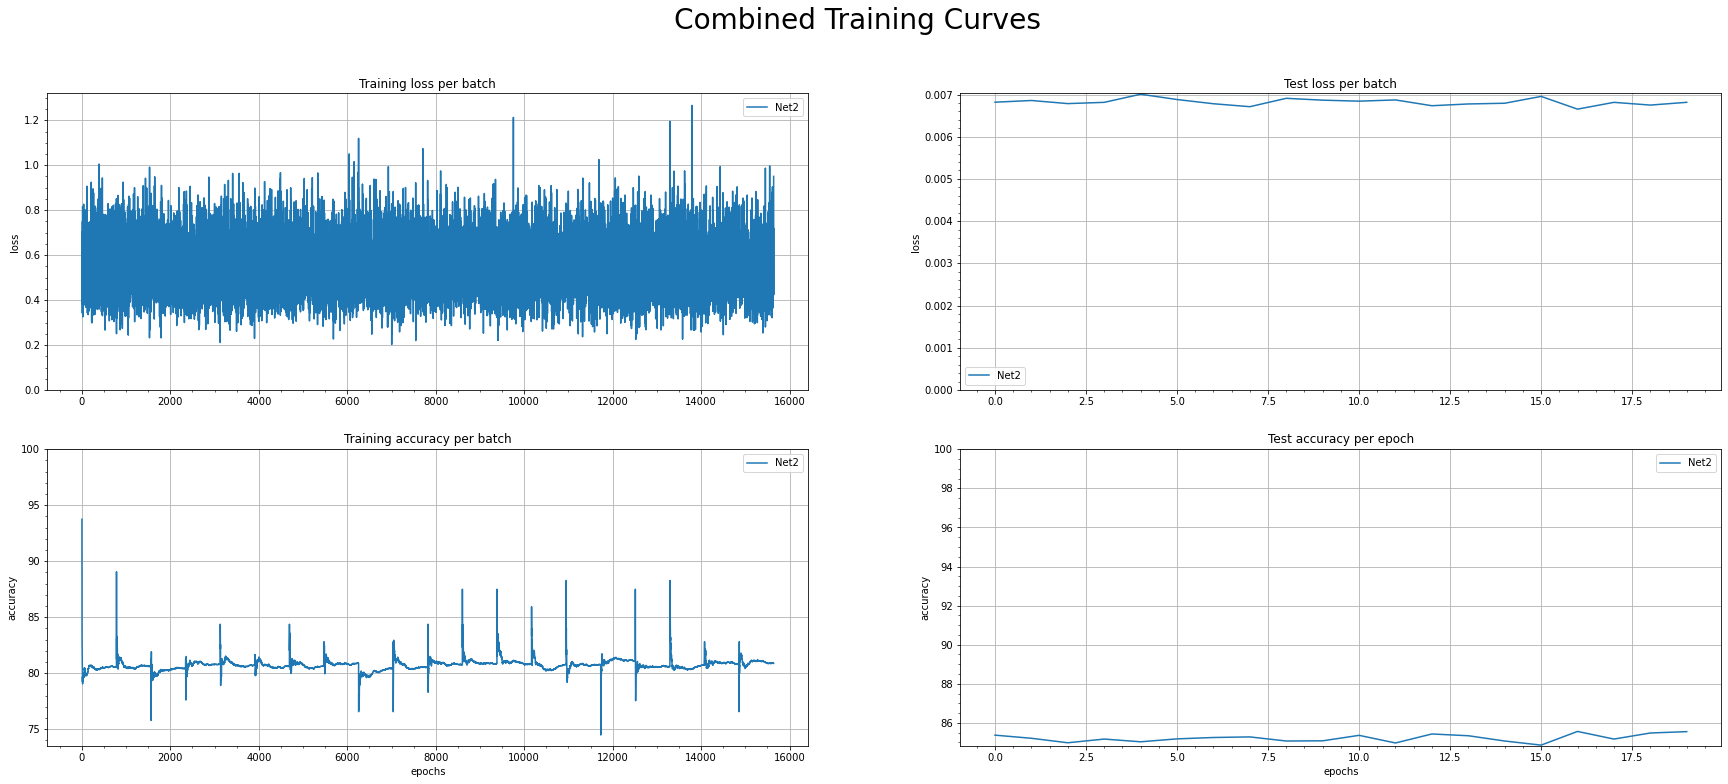

In [ ]:
training_curves(history)

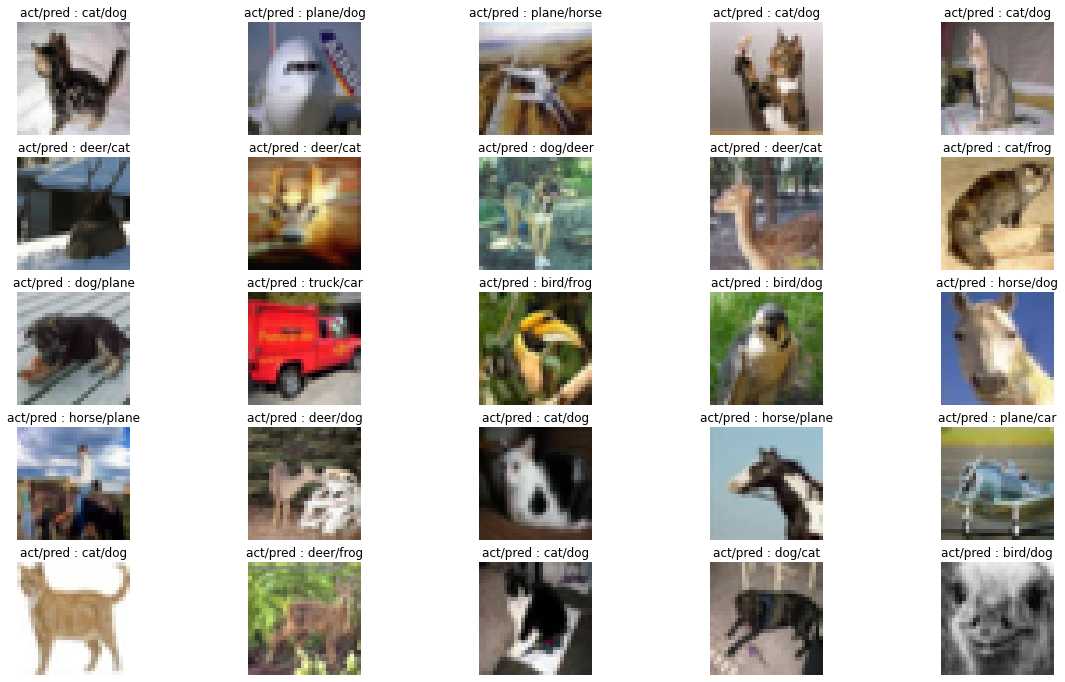

In [ ]:
def imshow(img):
	img = denormalize(img)
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.grid(b=None)
	return img

#classes = data.classes

model.eval()

figure = plt.figure(figsize=(20, 12))
num_of_images = 25
index = 1

misclass_img_list = []
untrans_img=[]

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(
            device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        act = target.view_as(pred)
        # since most of the bool vec is true (good problem to have) and switch (flip) the true to false and vice versa
        bool_vec = ~pred.eq(act)

        # now extract the index number from the tensor which has 'true'
        idx = list(
            np.where(bool_vec.cpu().numpy())[0])

        if idx:  # if not a blank list
            idx_list = idx
            # print(data[idx_list[0]].shape)
            if index < num_of_images+1:
                plt.subplot(5, 5, index)
                plt.axis('off')
                titl = 'act/pred : ' + \
                    str(classes[target[idx[0]].cpu().item(
                    )]) + '/' + str(classes[pred[idx[0]].cpu().item()])
                # prints the 1st index of each batch.
            
                img = data[idx[0]].cpu()
                untrans_img.append(img)
                image = imshow(img)
                misclass_img_list.append(image)
                                  


                plt.title(titl)
                index += 1



In [ ]:
# Specify a path
PATH = "Net2_120epoch_model.pt"

# Save
torch.save(model.state_dict(), PATH)

In [ ]:
from gradcam.visualize import VisualizeCam

target_layers = ["layer0", "layer1", "layer2", "layer3"]
viz_cam = VisualizeCam(model, classes, target_layers)

In [ ]:
num_img = 5
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect")

RuntimeError: Mismatch in shape: grad_output[0] has a shape of torch.Size([5, 10]) and output[0] has a shape of torch.Size([5, 40]).